In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [2]:
# Load Data and Preprocess
def load_data(filepath):
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method)
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

In [3]:
def load_data(filepath):
    """Load and preprocess the bank marketing dataset.

    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """
    # Load data
    df = pd.read_csv(filepath, sep=';')

    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'poutcome', 'y']

    # Apply label encoding to categorical columns
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])

    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
               'housing', 'loan', 'default']
    X = df[features]

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, df

# Load and preprocess the data
X_scaled, data = load_data('bank-full.csv')
print("Data shape:", X_scaled.shape)


Data shape: (45211, 9)


In [4]:
class KMeansClustering:
    """Minimal K-means skeleton for students to implement."""
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        np.random.seed(self.random_state)
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[indices]

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        new_centroids = np.zeros_like(self.centroids)
        for k in range(self.n_clusters):
            points = X[labels == k]
            if len(points) > 0:
                new_centroids[k] = points.mean(axis=0)
            else:
                new_centroids[k] = self.centroids[k]
        return new_centroids

    def fit(self, X):
        self.centroids = self._initialize_centroids(X)
        for _ in range(self.max_iters):
            labels = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, labels)
            if np.allclose(self.centroids, new_centroids, atol=1e-6):
                break
            self.centroids = new_centroids
        self.labels = self._assign_clusters(X)
        return self

    def predict(self, X):
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)


## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

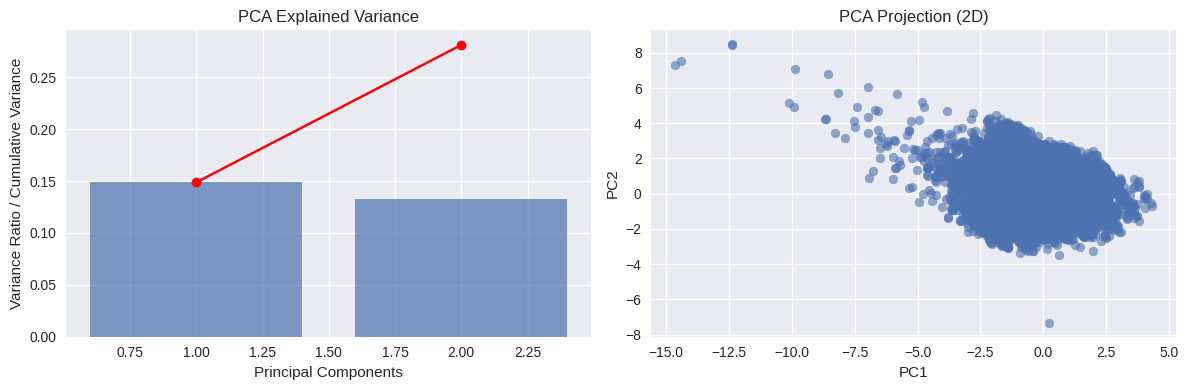

Shape after PCA: (45211, 2)


In [5]:
def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction."""
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # Visualization
    plt.figure(figsize=(12, 4))

    # Explained variance ratio plot
    plt.subplot(1, 2, 1)
    plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_, alpha=0.7)
    plt.plot(range(1, n_components + 1),
             np.cumsum(pca.explained_variance_ratio_), marker='o', color='red')
    plt.title('PCA Explained Variance')
    plt.xlabel('Principal Components')
    plt.ylabel('Variance Ratio / Cumulative Variance')

    # 2D PCA scatter
    plt.subplot(1, 2, 2)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, s=40)
    plt.title('PCA Projection (2D)')
    plt.xlabel('PC1')
    plt.ylabel('PC2')

    plt.tight_layout()
    plt.show()

    return X_pca

# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)


## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

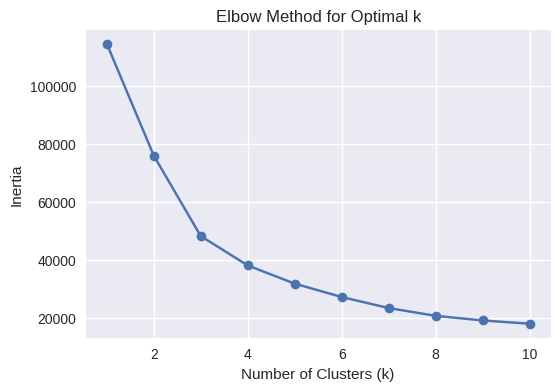

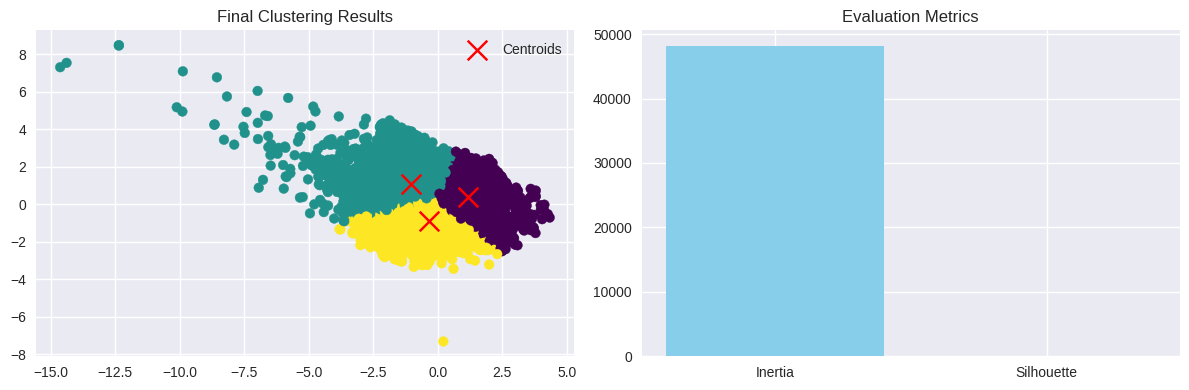


Clustering Evaluation:
Inertia: 48179.64
Silhouette Score: 0.39


In [9]:
def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia)."""
    inertia = 0
    for k in range(len(centroids)):
        cluster_points = X[labels == k]
        inertia += np.sum((cluster_points - centroids[k]) ** 2)
    return inertia

def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters."""
    inertias = []
    K = range(1, max_k + 1)

    for k in K:
        km = KMeansClustering(n_clusters=k)
        km.fit(X)
        inertia = calculate_inertia(X, km.labels, km.centroids)
        inertias.append(inertia)

    plt.figure(figsize=(6, 4))
    plt.plot(K, inertias, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

    return inertias

# Try different numbers of clusters
inertias = plot_elbow_curve(X_pca)

# Apply final clustering
kmeans = KMeansClustering(n_clusters=3)
kmeans.fit(X_pca)

# Visualize final results
plt.figure(figsize=(12, 4))

# Plot clusters
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
            c='red', marker='x', s=200, label='Centroids')
plt.title('Final Clustering Results')
plt.legend()

# Evaluation metric visualization
plt.subplot(1, 2, 2)
plt.bar(['Inertia', 'Silhouette'], [
    calculate_inertia(X_pca, kmeans.labels, kmeans.centroids),
    silhouette_score(X_pca, kmeans.labels)
], color=['skyblue', 'lightgreen'])
plt.title('Evaluation Metrics')

plt.tight_layout()
plt.show()

# Calculate and print evaluation metrics
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette = silhouette_score(X_pca, kmeans.labels)

print("\nClustering Evaluation:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")


## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

In [7]:
class BisectingKMeans:
    """Concise skeleton for bisecting K-means algorithm."""
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        self.split_tree = {}
        self.centers_ = {}

    def fit_predict(self, X):
        np.random.seed(self.random_state)
        labels = np.zeros(X.shape[0], dtype=int)
        current_k = 1

        while current_k < self.n_clusters:
            unique_labels, counts = np.unique(labels, return_counts=True)
            largest_cluster = unique_labels[np.argmax(counts)]
            mask = labels == largest_cluster

            kmeans_2 = KMeansClustering(n_clusters=2, random_state=self.random_state)
            kmeans_2.fit(X[mask])
            split_labels = kmeans_2.labels

            new_label = max(labels) + 1
            labels[mask] = np.where(split_labels == 0, largest_cluster, new_label)

            self.split_tree[largest_cluster] = (largest_cluster, new_label)
            self.centers_[largest_cluster] = kmeans_2.centroids
            current_k = len(np.unique(labels))

        self.labels_ = labels
        return labels

# Example usage:
# bisect = BisectingKMeans(n_clusters=4)
# labels = bisect.fit_predict(X_pca)
# plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='tab10')
# plt.title("Bisecting K-Means Clustering")
# plt.show()


## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!